In [1]:
# Load some test data
import pandas as pd
mpg = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/mpg.csv')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [2]:
mpg.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [3]:
# Import the libraries we need
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Commonly used modules
import numpy as np

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
# import seaborn as sns
# import cv2
# import IPython
# from six.moves import urllib

# print(tf.__version__)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score


In [4]:
# need to deal with ?s in the data
mpg.loc[[32],'horsepower'] = 72
mpg.loc[[126],'horsepower'] = 85
mpg.loc[[330],'horsepower'] = 64
mpg.loc[[354],'horsepower'] = 83
mpg.loc[[336],'horsepower'] = 75
mpg.loc[[374],'horsepower'] = 90

In [5]:
# one hot encode origin
mpg['origin'] = mpg['origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

mpg = pd.get_dummies(mpg, columns=['origin'], prefix='', prefix_sep='')


In [6]:
X = mpg.drop(columns=["mpg","name"])
y = mpg.mpg

In [7]:
# look at data, now it is all numeric
X


,cylinders,displacement,horsepower,weight,acceleration,year,Europe,Japan,USA
0,8,307.0,130,3504,12.0,70,False,False,True
1,8,350.0,165,3693,11.5,70,False,False,True
2,8,318.0,150,3436,11.0,70,False,False,True
3,8,304.0,150,3433,12.0,70,False,False,True
4,8,302.0,140,3449,10.5,70,False,False,True
...,...,...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,82,False,False,True
394,4,97.0,52,2130,24.6,82,True,False,False
395,4,135.0,84,2295,11.6,82,False,False,True
396,4,120.0,79,2625,18.6,82,False,False,True


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
y_train

,mpg
157,15.0
109,21.0
17,21.0
253,20.5
24,21.0
...,...
71,19.0
106,12.0
270,21.1
348,37.7


In [10]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

# transform testing dataabs
X_test = norm.transform(X_test)

In [11]:
# len(X_train[0])

In [12]:
# build a neural network using a sequential model
# input layer node size is the same as the training columns
# hidden layers: 128 node layer, 256 node layer, 64 node layer
# a single node output layer
model = Sequential()
model.add(Dense(128, input_dim=len(X_train[0]), activation='sigmoid'))
model.add(Dropout(.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='leaky_relu'))

model.add(Dense(1, activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,817 (198.50 KB)

 Trainable params: 50,817 (198.50 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# opt = keras.optimizers.Adam(learning_rate=0.0001)
opt = keras.optimizers.Adam()
model.compile(loss="mean_squared_error", optimizer=opt, metrics=['mse'])

In [15]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_mse', patience=30)

history = model.fit(X_train, y_train, epochs=2000, validation_split=.35, batch_size=20, callbacks=[early_stop],shuffle=False)
# history = model.fit(train_features, train_labels, epochs=2000, verbose=0, validation_split = .2, batch_size=tester2,
#                     callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)

Epoch 1/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 623.9949 - mse: 623.9949 - val_loss: 565.2075 - val_mse: 565.2075
Epoch 2/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 558.2029 - mse: 558.2029 - val_loss: 454.9144 - val_mse: 454.9144
Epoch 3/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 416.3995 - mse: 416.3995 - val_loss: 244.7717 - val_mse: 244.7717
Epoch 4/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 206.0936 - mse: 206.0936 - val_loss: 124.8398 - val_mse: 124.8398
Epoch 5/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 130.2001 - mse: 130.2001 - val_loss: 78.8660 - val_mse: 78.8660
Epoch 6/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 67.4324 - mse: 67.4324 - val_loss: 51.6436 - val_mse: 51.6436
Epoch 7/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 52.1390 - mse: 52.1390 - val_loss: 36.2716 - val_mse: 36.2716
Epoch 8/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 32.2955 - mse: 32.2955 - val_loss: 32.2602 - val_mse: 32.2602
Epoch 9/2000
9/9 ━━━━

In [16]:
hist

,loss,mse,val_loss,val_mse
0,599.360962,599.360962,565.207458,565.207458
1,521.590515,521.590515,454.914368,454.914368
2,363.883209,363.883209,244.771729,244.771729
3,172.825623,172.825623,124.839806,124.839806
4,124.637573,124.637573,78.866043,78.866043
...,...,...,...,...
165,6.966622,6.966622,8.196185,8.196185
166,9.379579,9.379579,9.416216,9.416216
167,9.012967,9.012967,8.073352,8.073352
168,7.429448,7.429448,7.637434,7.637434


In [17]:
# h = hist
hist = hist.reset_index()
# h

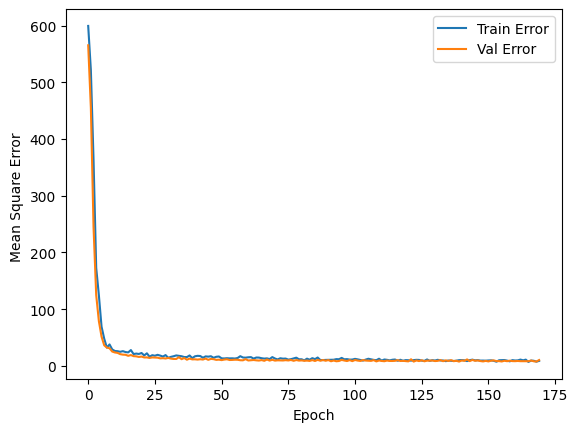

In [18]:
def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error ')
    plt.plot(hist['index'], hist['mse'], label='Train Error')
    plt.plot(hist['index'], hist['val_mse'], label = 'Val Error')
    plt.legend()
    # plt.ylim([0,50])

plot_history()

In [19]:
predictions = np.round(model.predict(X_test),1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step


In [20]:
predictions

array([[31. ],
       [29. ],
       [19.9],
       [14.9],
       [13.5],
       [24. ],
       [26.3],
       [11.5],
       [16.5],
       [19.7],
       [13. ],
       [34.7],
       [23.9],
       [13.9],
       [21.7],
       [11.6],
       [29.3],
       [20. ],
       [14.1],
       [34.6],
       [21. ],
       [19. ],
       [24.2],
       [27.5],
       [15.4],
       [40.1],
       [22.1],
       [22.2],
       [18.1],
       [12.2],
       [27.6],
       [35.9],
       [16.7],
       [22.3],
       [32.6],
       [11.8],
       [21.7],
       [17.4],
       [13.5],
       [23. ],
       [23.3],
       [26.5],
       [19. ],
       [11. ],
       [21.1],
       [31.9],
       [22.9],
       [20.2],
       [22.5],
       [25.3],
       [21.1],
       [32. ],
       [30.4],
       [12.1],
       [25.1],
       [12.3],
       [16.1],
       [27.1],
       [22. ],
       [17.9],
       [13.9],
       [30.1],
       [21.4],
       [18.7],
       [19.1],
       [21.7],
       [22

In [ ]:

result = root_mean_squared_error(y_test, predictions)
result

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


2.5470408111456555

In [22]:

r2 = r2_score(y_test,predictions)
r2

0.886961792610447

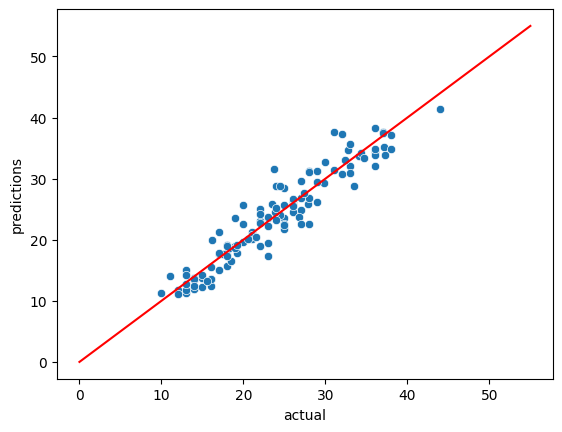

In [32]:
pred = pd.DataFrame(predictions,columns=['predictions'])
pred
pred['actual'] = y_test.tolist()
pred

pred['difference'] = pred['actual']-pred['predictions']
pred

import seaborn as sns
xlims =(0,55)
ax = sns.scatterplot(data=pred,x='actual',y='predictions')
ax.plot(xlims,xlims, color='r')
plt.show()

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam, RMSprop
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV

# Define the function to create the model
def create_model(optimizer='adam', dropout_rate=0.5, activation='relu'):
    model = Sequential()
    model.add(Input(shape=(len(X_train[0]),)))  # Use Input layer instead of input_dim
    model.add(Dense(128, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(256, activation=activation))
    model.add(Dense(64, activation='leaky_relu'))
    model.add(Dense(1, activation='relu'))
    model.compile(loss='mse', optimizer=optimizer)
    return model

# Wrap the model with KerasRegressor for compatibility with GridSearchCV
model = KerasRegressor(model=create_model, verbose=1)

# Define the grid of hyperparameters
param_grid = {
    # 'model__optimizer': ['adam', 'rmsprop'],
    'model__dropout_rate': [0.3, 0.5, 0.7],
    'model__activation': ['relu', 'tanh'],
    'batch_size': [16, 32, 64],
    'epochs': [10]  # You can reduce the number of epochs to speed up testing
}

# Set up GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)

# Execute the grid search
grid_result = grid.fit(X_train, y_train)

# Output the best parameters and score
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 609.7872
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 452.4661  
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 187.6786 
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 108.9214 
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 46.8077 
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36.1160 
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.7492 
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.5154
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.6389 
Epoch 10/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.4012 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - loss: 636.3880
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 447.6510  
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 185.7491 
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 97.3913  
Epoch 5/10
12

In [34]:
# Get the best hyperparameters from the grid search
best_params = grid_result.best_params_

# Recreate the model with the best parameters
final_model = create_model(
    dropout_rate=best_params['model__dropout_rate'],
    activation=best_params['model__activation']
)
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=15,restore_best_weights=True,mode='min')

# Train the model for 300 epochs with the best parameters
final_model.fit(X_train, y_train, epochs=300, batch_size=best_params['batch_size'],validation_split=.35,  verbose=1, callbacks=[early_stop])

# Evaluate the model (if you have a validation set or test set, use it here)
# For example:
# final_score = final_model.evaluate(X_test, y_test)
# print("Final model score:", final_score)


Epoch 1/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - loss: 560.3405 - val_loss: 496.7698
Epoch 2/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 460.8287 - val_loss: 215.4029
Epoch 3/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 158.7027 - val_loss: 115.0470
Epoch 4/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 99.0053 - val_loss: 51.3919
Epoch 5/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 40.5032 - val_loss: 34.6491
Epoch 6/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 27.3578 - val_loss: 29.4652
Epoch 7/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24.8274 - val_loss: 26.4471
Epoch 8/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28.3586 - val_loss: 22.1491
Epoch 9/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22.8172 - val_loss: 21.4341
Epoch 10/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.3286 - val_loss: 18.1379
Epoch 11/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18.9762 - val_loss: 18.6480
Epoch 12/300
12/12 ━━━━━━━━━━━━━━

In [35]:
predictions = np.round(final_model.predict(X_test),1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [ ]:
result = root_mean_squared_error(y_test, predictions)
result

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


2.363172255108155

In [37]:
r2 = r2_score(y_test,predictions)
r2

0.902692971051797

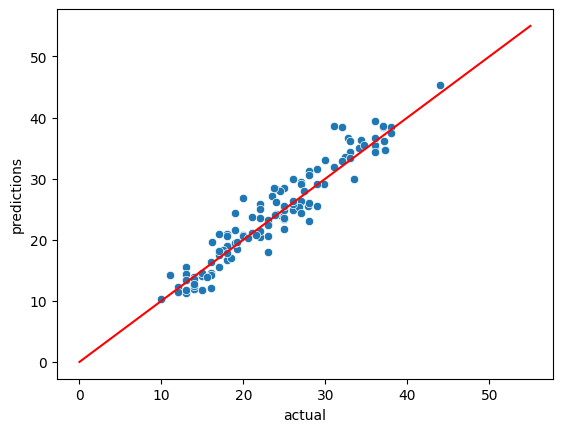

In [38]:
pred = pd.DataFrame(predictions,columns=['predictions'])
pred
pred['actual'] = y_test.tolist()
pred

pred['difference'] = pred['actual']-pred['predictions']
pred

import seaborn as sns
xlims =(0,55)
ax = sns.scatterplot(data=pred,x='actual',y='predictions')
ax.plot(xlims,xlims, color='r')
plt.show()

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam, RMSprop
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the function to create the model
def create_model(optimizer='adam', dropout_rate=0.5, activation='relu'):
    model = Sequential()
    model.add(Input(shape=(len(X_train[0]),)))  # Use Input layer instead of input_dim
    model.add(Dense(128, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(256, activation=activation))
    model.add(Dense(64, activation='leaky_relu'))
    model.add(Dense(1, activation='relu'))
    model.compile(loss='mse', optimizer=optimizer)
    return model

# Wrap the model with KerasRegressor for compatibility with RandomizedSearchCV
model = KerasRegressor(model=create_model, verbose=1)

# Define the parameter grid
param_dist = {
    'model__dropout_rate': [0.25, 0.3, 0.4, 0.5, 0.7],
    'model__activation': ['relu', 'tanh','swish','leaky_relu'],
    'batch_size': [5,10,18,16, 32, 64],
    'epochs': [10]  # You can reduce the number of epochs to speed up testing
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10,
                                   scoring='neg_mean_squared_error', cv=2,random_state=42)

# Execute the randomized search
random_search_result = random_search.fit(X_train, y_train)

# Output the best parameters and score
print("Best: %f using %s" % (random_search_result.best_score_, random_search_result.best_params_))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 271ms/step - loss: 601.3179
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 525.7305
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 382.9744 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 218.0447 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 137.0967 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 94.2413  
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 82.3713  
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 41.1135 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34.8378 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 39.1026 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - loss: 608.9999
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 488.8852 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 378.4766 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 212.4887 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 456.6634
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 47.0504
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29.1419
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.4279
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.0420
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.3055
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.5299
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.6239
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.5421
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.1270
Best: -17.921098 using {'model__dropout_rate': 0.25, 'model__activation': 'swish', 'epochs': 10, 'batch_size': 5}


In [51]:
print("Number of tests run:", len(random_search_result.cv_results_['params']))

Number of tests run: 10


In [65]:
# Get the best hyperparameters from the grid search
best_params = random_search_result.best_params_

# Recreate the model with the best parameters
final_model = create_model(
    dropout_rate=best_params['model__dropout_rate'],
    activation=best_params['model__activation']
)
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=15,restore_best_weights=True,mode='min')

# Train the model for 300 epochs with the best parameters
final_model.fit(X_train, y_train, epochs=300, batch_size=best_params['batch_size'],validation_split=.35,  verbose=1, callbacks=[early_stop])

# Evaluate the model (if you have a validation set or test set, use it here)
# For example:
# final_score = final_model.evaluate(X_test, y_test)
# print("Final model score:", final_score)


Epoch 1/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 515.0590 - val_loss: 139.8799
Epoch 2/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 141.2697 - val_loss: 55.1538
Epoch 3/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31.5894 - val_loss: 30.2420
Epoch 4/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25.9805 - val_loss: 26.1398
Epoch 5/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25.7522 - val_loss: 23.7410
Epoch 6/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.5040 - val_loss: 21.5100
Epoch 7/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.3512 - val_loss: 20.7110
Epoch 8/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.8790 - val_loss: 19.3527
Epoch 9/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.5911 - val_loss: 19.3636
Epoch 10/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.5372 - val_loss: 16.7413
Epoch 11/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.4803 - val_loss: 16.3049
Epoch 12/300
36/36 ━━━━━━━━━━━━━━━━━━

In [66]:
predictions = np.round(final_model.predict(X_test),1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


In [ ]:
result = root_mean_squared_error(y_test, predictions)
result

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


2.426502926519617

In [68]:
r2 = r2_score(y_test,predictions)
r2

0.8974076227948264

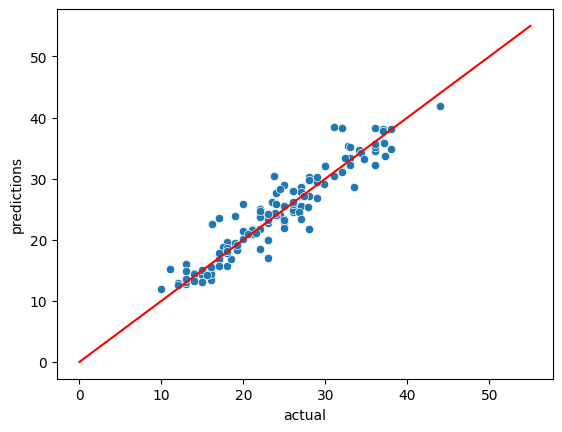

In [69]:
pred = pd.DataFrame(predictions,columns=['predictions'])
pred
pred['actual'] = y_test.tolist()
pred

pred['difference'] = pred['actual']-pred['predictions']
pred

import seaborn as sns
xlims =(0,55)
ax = sns.scatterplot(data=pred,x='actual',y='predictions')
ax.plot(xlims,xlims, color='r')
plt.show()